In [14]:

# Análise Fatorial PCA
# MBA em Data Science e Analytics USP ESALQ

# Prof. Dr. Wilson Tarantin Junior

In [15]:

!pip install pandas
!pip install numpy
!pip install factor_analyzer
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install pingouin
!pip install pyshp


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go

In [17]:

casas = pd.read_excel("preco_casas.xlsx")
# Fonte: adaptado de https://www.kaggle.com/datasets/elakiricoder/jiffs-house-price-prediction-dataset

# É possível extrairmos fatores que capturem o preço de venda das casas?

In [18]:

tab_desc = casas.describe()

In [19]:

# Matriz de correlações
# aqui gera as correlações
# Correlaçõies altas favorecem a representaçã das variáveis no mesmo fator 
corr = casas.corr()

# Gráfico interativo
# aqui é só o gráfico
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))

fig.show()

In [20]:

# Vamos deixar o preço das casas de fora da análise fatorial! 

casas_pca = casas.drop(columns=['property_value'])

In [21]:
# analisado se a matriz é estatisticamente diferente da identidade ou seja se existe alguma correlação que valha a pena
# se o p valor menorr que a significância eu rejeito ho e aceito h1, ou seja minha matriz possui correlações significativas. 
bartlett, p_value = calculate_bartlett_sphericity(casas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 31857.46
p-valor: 0.0


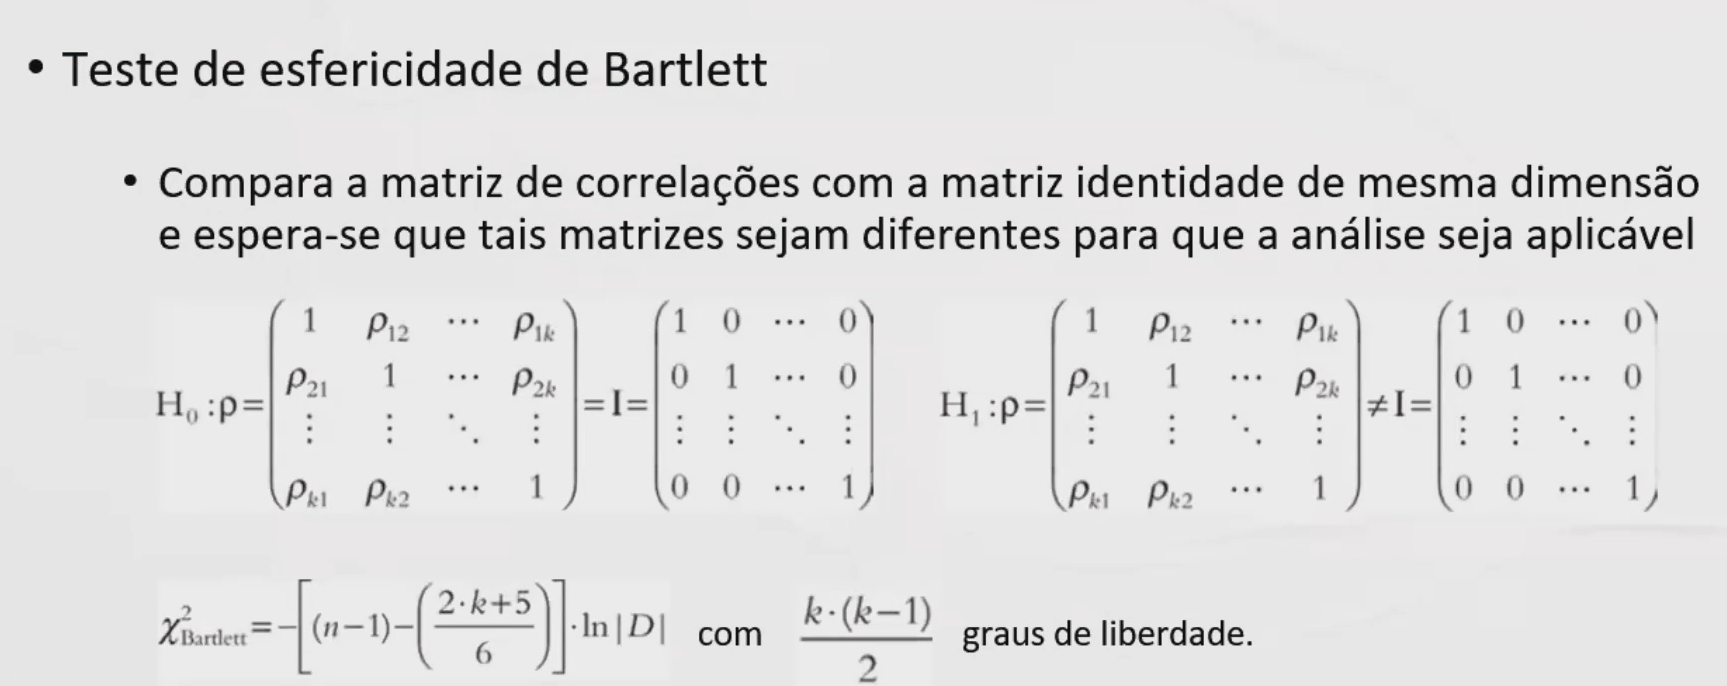

In [7]:
#Aqui gera as análises mesmo 
fa = FactorAnalyzer(n_factors=8, method='principal', rotation=None).fit(casas_pca)

In [8]:

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

# Soma dos autovalores

round(autovalores.sum(), 2)

[3.44078793 1.01989592 1.01155913 0.99164638 0.97675882 0.42231466
 0.128448   0.00858917]


8.0

In [9]:
#Aqui escolhemos apenas autovalores maiores que 1 isso é definido como critério de Kaizer(raiz latente)
# Quanto maior o autovalor mais variáveis estão sendo representadas nele 
# Temos 3 autovalores maiores do que 1
# Vamos parametrizar a função para a extração de 3 fatores!

fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(casas_pca)

In [10]:
# Se aplicamos a redução estrutural agente perde um pouco de dados da variancia 
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T
# A soma dos autovalores sõ serã igual ao n~umero de variãveis se estiver considerando todos os autovalores 
print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   3.440788   0.430098             0.430098
Fator 2   1.019896   0.127487             0.557585
Fator 3   1.011559   0.126445             0.684030


C:\Users\matheus.marchiore\AppData\Local\Temp\ipykernel_40384\3604922411.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




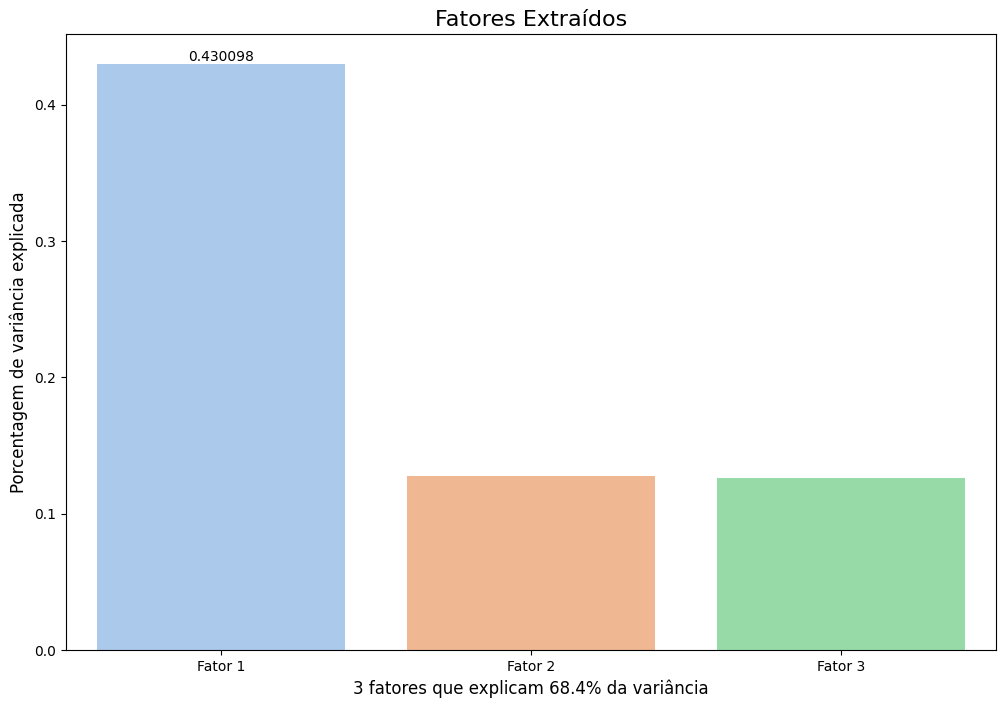

In [11]:

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='pastel')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

In [12]:
# As cargas fatorias representam a correlação de pearson entre os fator extaído e suas variáveis originais 
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_pca.columns

print(tabela_cargas)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.969318  0.000670  0.003416
house_size_sqm              0.967866 -0.000800  0.005045
no_of_rooms                 0.948705 -0.002536  0.002939
no_of_bathrooms             0.814810 -0.002453 -0.002870
distance_to_school         -0.013787  0.349991  0.642441
house_age                   0.007448  0.080374  0.692606
distance_to_supermarket_km -0.000987  0.720297 -0.113461
crime_rate_index            0.015520  0.610001 -0.325882


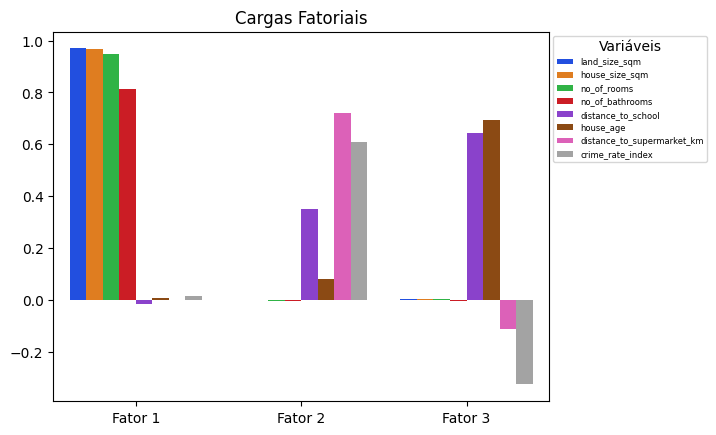

In [13]:

tabela_cargas_graph = tabela_cargas.reset_index()
tabela_cargas_graph = tabela_cargas_graph.melt(id_vars='index')

sns.barplot(data=tabela_cargas_graph, x='variable', y='value', hue='index', palette='bright')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [22]:
# as colunaridades representam o quanto nois perdemos das variãveis originais considerando  o criterio de Kaiser
# Quanto mais proximo de 1 menos eu perco infos, quanto mais próximos de 0 mais perdemos. 
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_pca.columns

print(tabela_comunalidades)

                            Comunalidades
land_size_sqm                    0.939590
house_size_sqm                   0.936791
no_of_rooms                      0.900057
no_of_bathrooms                  0.663930
distance_to_school               0.535414
house_age                        0.486218
distance_to_supermarket_km       0.531702
crime_rate_index                 0.478541


In [23]:
# Extração dos fatorespara as obserções do banco de dados 
fatores = pd.DataFrame(fa.transform(casas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

casas = pd.concat([casas.reset_index(drop=True), fatores], axis=1)

In [24]:
# Criando scores para os fatores
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_pca.columns

print(tabela_scores)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.281714  0.000657  0.003377
house_size_sqm              0.281292 -0.000784  0.004987
no_of_rooms                 0.275723 -0.002487  0.002906
no_of_bathrooms             0.236809 -0.002405 -0.002837
distance_to_school         -0.004007  0.343163  0.635100
house_age                   0.002165  0.078806  0.684691
distance_to_supermarket_km -0.000287  0.706245 -0.112164
crime_rate_index            0.004510  0.598101 -0.322158


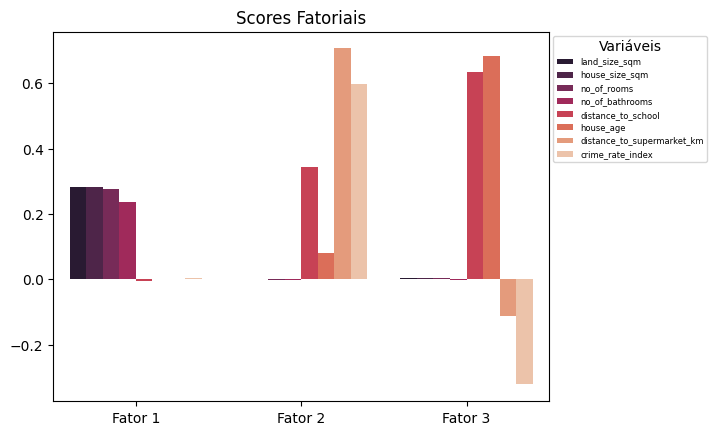

In [25]:
# O score é oque gera a expressão do fator
tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

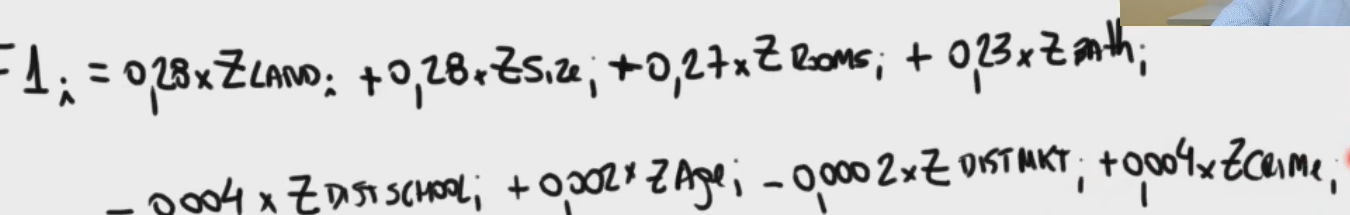

In [26]:
# ë uma soma ponderada, eu somos os fatores para cada obs ponderando pela variância comopartilhada
casas['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    casas['Ranking'] = casas['Ranking'] + casas[tabela_eigen.index[index]]*variancia

In [27]:

pg.rcorr(casas[['Ranking', 'property_value']], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

c:\Users\matheus.marchiore\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Ranking,property_value
Ranking,-,***
property_value,0.8494,-
